### Trabalho 1

Seguem instruções:

1) Baixar dataset em : https://www.kaggle.com/c/home-credit-default-risk/data

2) Explorar, conforme instruções:

* 'application_train.csv': Esse csv possui 122 colunas: explorar 40 colunas, sendo as primeiras 30 obrigatórias e 10 adicionais a escolher
* 30 colunas obrigatórias:

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
       
* alunos deverão se organizar para que todas as colunas sejam exploradas
* escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'

['HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']
 
3) objetivos:
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariadaj, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) entregável: jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) entrega limite: 8/agosto/2018 

6) trabalho individual. Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) avaliação:
   - jupyter notebook e arguição (se houver)

### Problema de Negócio

##### Do Kaggle:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

##### Entendimento do problema:

Como fornecer crédito para pessoas com histórico insuficiente ou inexistente?

Utilizando estes dados alternativos, pode ser criado um modelo preditivo quer será usado para fazer uma análise das pessoas, para saber se elas tem um histórico de bom pagamento, e fornecer crédito para estas pessoas.

#### importando as bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as mn

import seaborn as sns

pd.__version__



'0.23.3'

#### lendo o dataframe

In [3]:
df = pd.read_csv('application_train.csv', index_col=0)

#### escolhendo as colunas que serão trabalhadas

In [4]:
semente = 2701 #Data de aniversário
df40 = pd.concat([df.iloc[:,0:30], df.iloc[:,31:].sample(10,axis=1,random_state=semente)], axis=1)

In [5]:
df40.to_csv('application_train_40c.csv')

In [6]:
df40 = pd.read_csv('application_train_40c.csv', index_col=0)

#### conhecendo o dataframe

In [7]:
df40.shape

(307511, 40)

In [8]:
df40.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ENTRANCES_MODE,FLAG_DOCUMENT_18,ELEVATORS_AVG,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,LANDAREA_MODE,COMMONAREA_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0690,0,0.00,No,0.0,0.0,0.9722,0.0250,0.0377,0.0144
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0345,0,0.08,No,0.0,0.0,0.9851,0.0968,0.0128,0.0497
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
df40.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 40 columns):
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_POPULATION_RELATIVE      307511 non-null float64
D

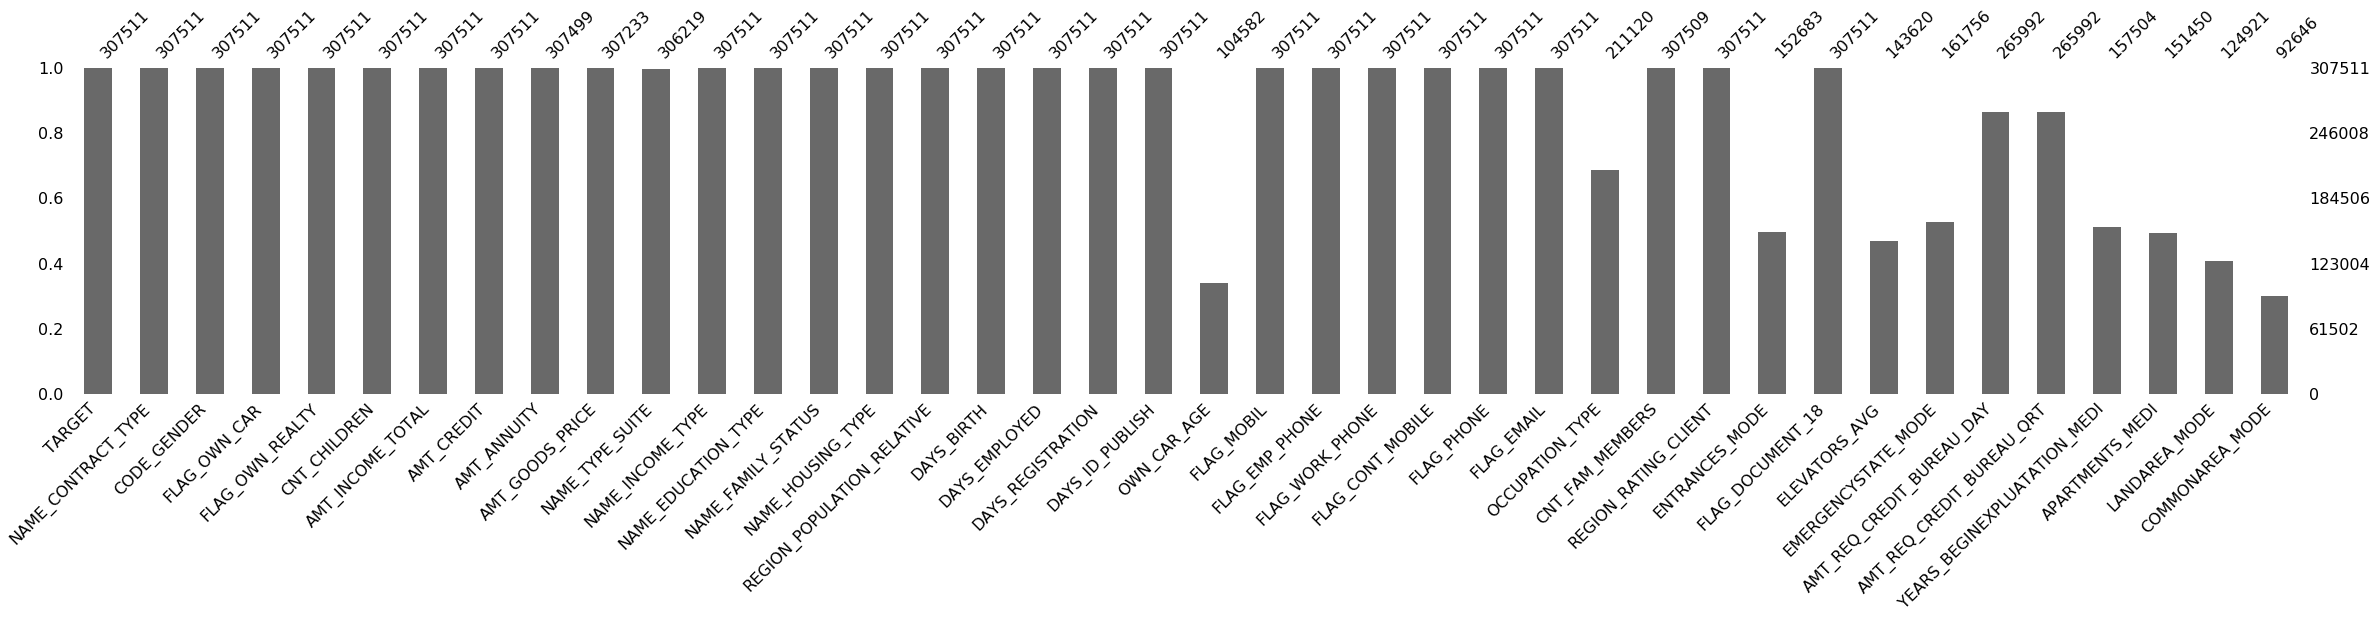

In [10]:
mn.bar(df40,figsize=(40,6))

##### Analisando as variáveis relativas a CARROS

In [11]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].head(20)

,FLAG_OWN_CAR,OWN_CAR_AGE
SK_ID_CURR,,
100002,N,NaN
100003,N,NaN
100004,Y,26.0
100006,N,NaN
100007,N,NaN
100008,N,NaN
100009,Y,17.0
100010,Y,8.0
100011,N,NaN


Foi observado que quando a pessoa não possuia carro ('FLAG_OWN_CAR'='N') o valor de 'OWN_CAR_AGE'=NaN, por isso substitui-se o NaN de OWN_CAR_AGE baseado na FLAG_OWN_CAR (N) por -1.

In [12]:
df40.OWN_CAR_AGE.fillna(-1, inplace = True)

In [13]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].head(20)

,FLAG_OWN_CAR,OWN_CAR_AGE
SK_ID_CURR,,
100002,N,-1.0
100003,N,-1.0
100004,Y,26.0
100006,N,-1.0
100007,N,-1.0
100008,N,-1.0
100009,Y,17.0
100010,Y,8.0
100011,N,-1.0


In [14]:
df40.EMERGENCYSTATE_MODE.loc[df40.FLAG_OWN_CAR == 'Yes'] = 1

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
df40.EMERGENCYSTATE_MODE.loc[df40.FLAG_OWN_CAR == 'No'] = 0

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 2 columns):
FLAG_OWN_CAR    307511 non-null object
OWN_CAR_AGE     307511 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.0+ MB


In [17]:
df40.to_csv('application_train_40c1.csv') # guardo as alteracoes feitas

##### Analisando as variáveis relativas as familias

In [18]:
df40 = pd.read_csv('application_train_40c1.csv', index_col=0) #leio o arquivo com as alteracoes de carros

In [19]:
df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS' == 'Unknown','CNT_FAM_MEMBERS']].head(10)

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,CNT_CHILDREN,False,CNT_FAM_MEMBERS
SK_ID_CURR,,,
100002,0,NaN,1.0
100003,0,NaN,2.0
100004,0,NaN,1.0
100006,0,NaN,2.0
100007,0,NaN,1.0
100008,0,NaN,2.0
100009,1,NaN,3.0
100010,0,NaN,2.0
100011,0,NaN,2.0


In [20]:
set(df40.NAME_FAMILY_STATUS) # descubro quais são os valores possíveis neste caso

{'Civil marriage',
 'Married',
 'Separated',
 'Single / not married',
 'Unknown',
 'Widow'}

Os diferentes valores que temos em Family status nos ajudam a definir um valor para este status:

{'Civil marriage' = 2,
 'Married' = 2,
 'Separated' = 1,
 'Single / not married' = 1,
 'Unknown' = CNT_FAM_MEMBERS - CNT_CHILDREN,
 'Widow' = 1}
 
Crio uma nova variavel para armazenar o numero de pessoas na casa

In [21]:
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Civil marriage'] = 2
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Married'] = 2
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Separated'] = 1
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Single / not married'] = 1
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Widow'] = 1

for i in df40.index:
    if df40.NAME_FAMILY_STATUS[i] == 'Unknown': 
        df40.NAME_FAMILY_STATUS[i] = (df40.CNT_FAM_MEMBERS[i] - df40.CNT_CHILDREN[i])

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
#df40.NAME_FAMILY_STATUS_NO

df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']].head(10)

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
SK_ID_CURR,,,
100002,0,1,1.0
100003,0,2,2.0
100004,0,1,1.0
100006,0,2,2.0
100007,0,1,1.0
100008,0,2,2.0
100009,1,2,3.0
100010,0,2,2.0
100011,0,2,2.0


In [23]:
df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 3 columns):
CNT_CHILDREN          307511 non-null int64
NAME_FAMILY_STATUS    307509 non-null object
CNT_FAM_MEMBERS       307509 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.4+ MB


Considerando que somente as duas linhas da familia estao com valores faltantes, podemos ignorar estes valores, apagando estas duas linhas do dataframe

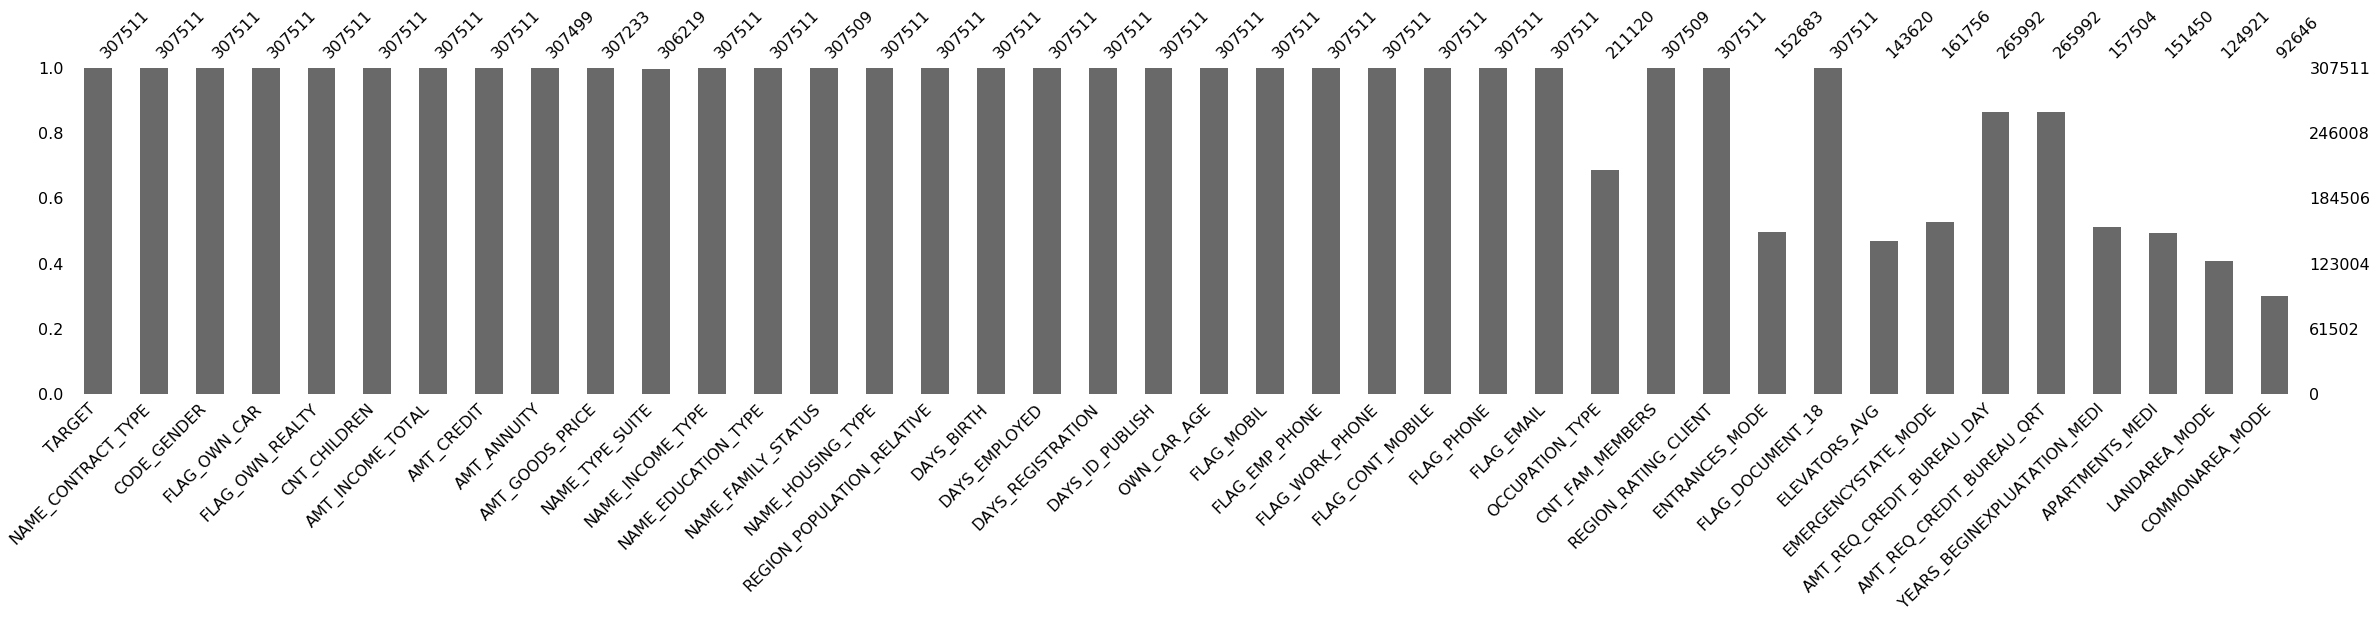

In [24]:
mn.bar(df40,figsize=(40,6))

In [25]:
df40.to_csv('application_train_40c2.csv')

##### Analisando a variável OCCUPATION_TYPE

In [26]:
df40 = pd.read_csv('application_train_40c2.csv', index_col=0) #leio o arquivo com as alteracoes de carros e familias

In [27]:
df.loc[:,['DAYS_EMPLOYED','FLAG_WORK_PHONE','OCCUPATION_TYPE']].head(10)

,DAYS_EMPLOYED,FLAG_WORK_PHONE,OCCUPATION_TYPE
SK_ID_CURR,,,
100002,-637,0,Laborers
100003,-1188,0,Core staff
100004,-225,1,Laborers
100006,-3039,0,Laborers
100007,-3038,0,Core staff
100008,-1588,1,Laborers
100009,-3130,0,Accountants
100010,-449,1,Managers
100011,365243,0,NaN


In [28]:
set(df40.OCCUPATION_TYPE) # descubro quais são os valores possíveis neste caso

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Waiters/barmen staff',
 nan}

In [29]:
df40.OCCUPATION_TYPE.fillna('Unknown', inplace = True)

In [30]:
set(df40.OCCUPATION_TYPE) # confirmo que NaN foi trocado por Unknown

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Unknown',
 'Waiters/barmen staff'}

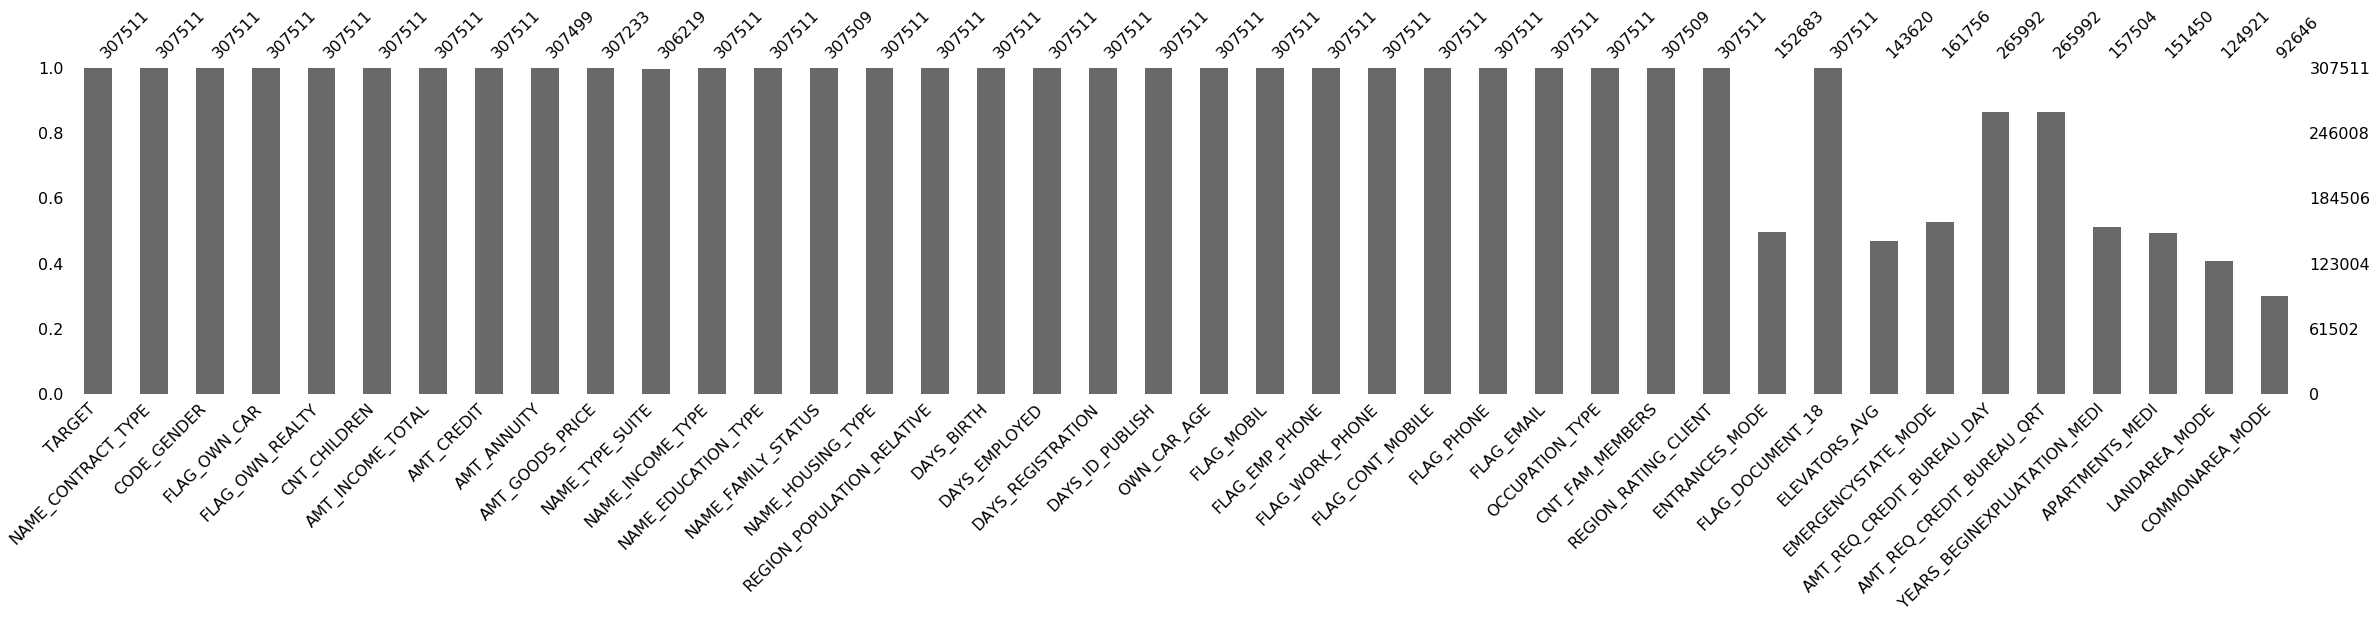

In [31]:
mn.bar(df40,figsize=(40,6))

In [32]:
df40.to_csv('application_train_40c3.csv') # guardo as alteracoes feitas

#### Analisando variáveis do imóvel

In [33]:
df40 = pd.read_csv('application_train_40c3.csv', index_col=0) #leio o arquivo com as alteracoes de carros e familias

In [34]:
df40.ENTRANCES_MODE.head()

SK_ID_CURR
100002    0.0690
100003    0.0345
100004       NaN
100006       NaN
100007       NaN
Name: ENTRANCES_MODE, dtype: float64

In [35]:
df40.ELEVATORS_AVG.head()

SK_ID_CURR
100002    0.00
100003    0.08
100004     NaN
100006     NaN
100007     NaN
Name: ELEVATORS_AVG, dtype: float64

In [36]:
df40.APARTMENTS_MEDI.head()

SK_ID_CURR
100002    0.0250
100003    0.0968
100004       NaN
100006       NaN
100007       NaN
Name: APARTMENTS_MEDI, dtype: float64

In [37]:
df40.LANDAREA_MODE.head()

SK_ID_CURR
100002    0.0377
100003    0.0128
100004       NaN
100006       NaN
100007       NaN
Name: LANDAREA_MODE, dtype: float64

In [38]:
df40.COMMONAREA_MODE.head()

SK_ID_CURR
100002    0.0144
100003    0.0497
100004       NaN
100006       NaN
100007       NaN
Name: COMMONAREA_MODE, dtype: float64

In [39]:
df40.YEARS_BEGINEXPLUATATION_MEDI.head()

SK_ID_CURR
100002    0.9722
100003    0.9851
100004       NaN
100006       NaN
100007       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

Nestas 6 variaveis, optei por substituir o NaN pela media dos valores

In [40]:
df40.ENTRANCES_MODE.fillna(df40.ENTRANCES_MODE.mean(), inplace = True)

In [41]:
df40.ELEVATORS_AVG.fillna(df40.ELEVATORS_AVG.mean(), inplace = True)

In [42]:
df40.APARTMENTS_MEDI.fillna(df40.APARTMENTS_MEDI.mean(), inplace = True)

In [43]:
df40.LANDAREA_MODE.fillna(df40.LANDAREA_MODE.mean(), inplace = True)

In [44]:
df40.COMMONAREA_MODE.fillna(df40.COMMONAREA_MODE.mean(), inplace = True)

In [45]:
df40.YEARS_BEGINEXPLUATATION_MEDI.fillna(df40.YEARS_BEGINEXPLUATATION_MEDI.mean(), inplace = True)

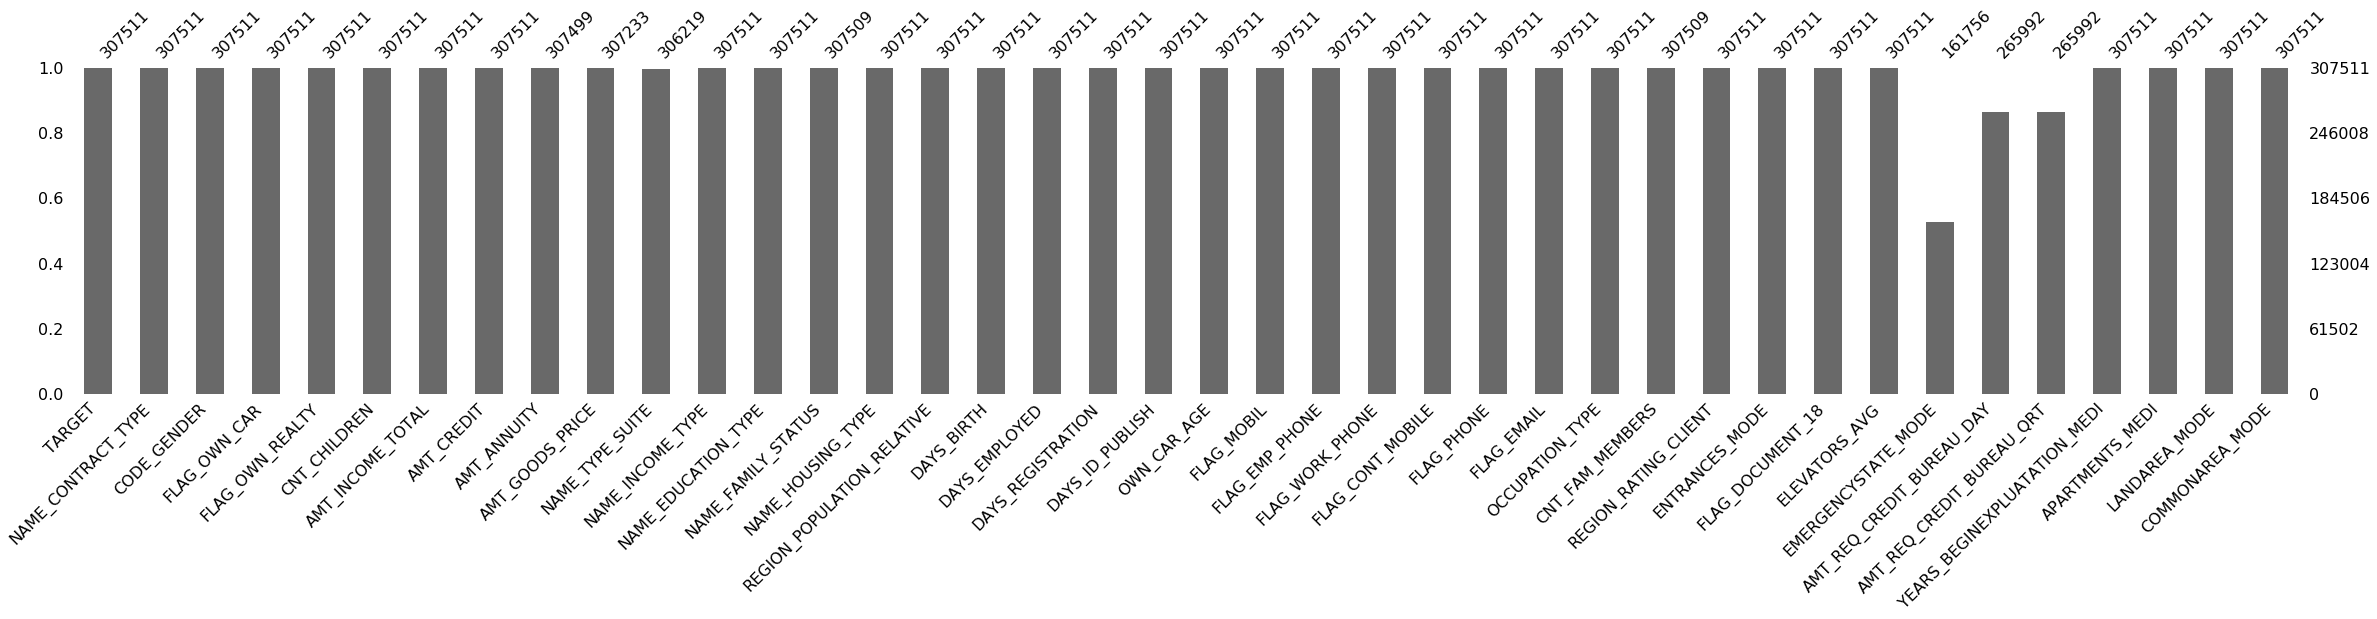

In [46]:
mn.bar(df40,figsize=(40,6))

In [47]:
df40.to_csv('application_train_40c4.csv') # guardo as alteracoes feitas

#### Verificando EMERGENCYSTATE_MODE

In [48]:
df40 = pd.read_csv('application_train_40c4.csv', index_col=0) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [49]:
df40.loc[:,['TARGET','EMERGENCYSTATE_MODE']].head(20)

,TARGET,EMERGENCYSTATE_MODE
SK_ID_CURR,,
100002,1,No
100003,0,No
100004,0,NaN
100006,0,NaN
100007,0,NaN
100008,0,NaN
100009,0,NaN
100010,0,NaN
100011,0,NaN


In [50]:
set(df40.EMERGENCYSTATE_MODE)

{'No', 'Yes', nan}

In [51]:
df40.EMERGENCYSTATE_MODE.loc[df40.EMERGENCYSTATE_MODE == 'No'] = 0

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
df40.EMERGENCYSTATE_MODE.loc[df40.EMERGENCYSTATE_MODE == 'Yes'] = 1

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
df40.EMERGENCYSTATE_MODE.fillna(-1, inplace = True)

In [54]:
df40.loc[:,['TARGET','EMERGENCYSTATE_MODE']].head()

,TARGET,EMERGENCYSTATE_MODE
SK_ID_CURR,,
100002,1,0
100003,0,0
100004,0,-1
100006,0,-1
100007,0,-1


In [55]:
df40[['TARGET','EMERGENCYSTATE_MODE']].corr()

,TARGET,EMERGENCYSTATE_MODE
TARGET,1.000000,-0.039409
EMERGENCYSTATE_MODE,-0.039409,1.000000


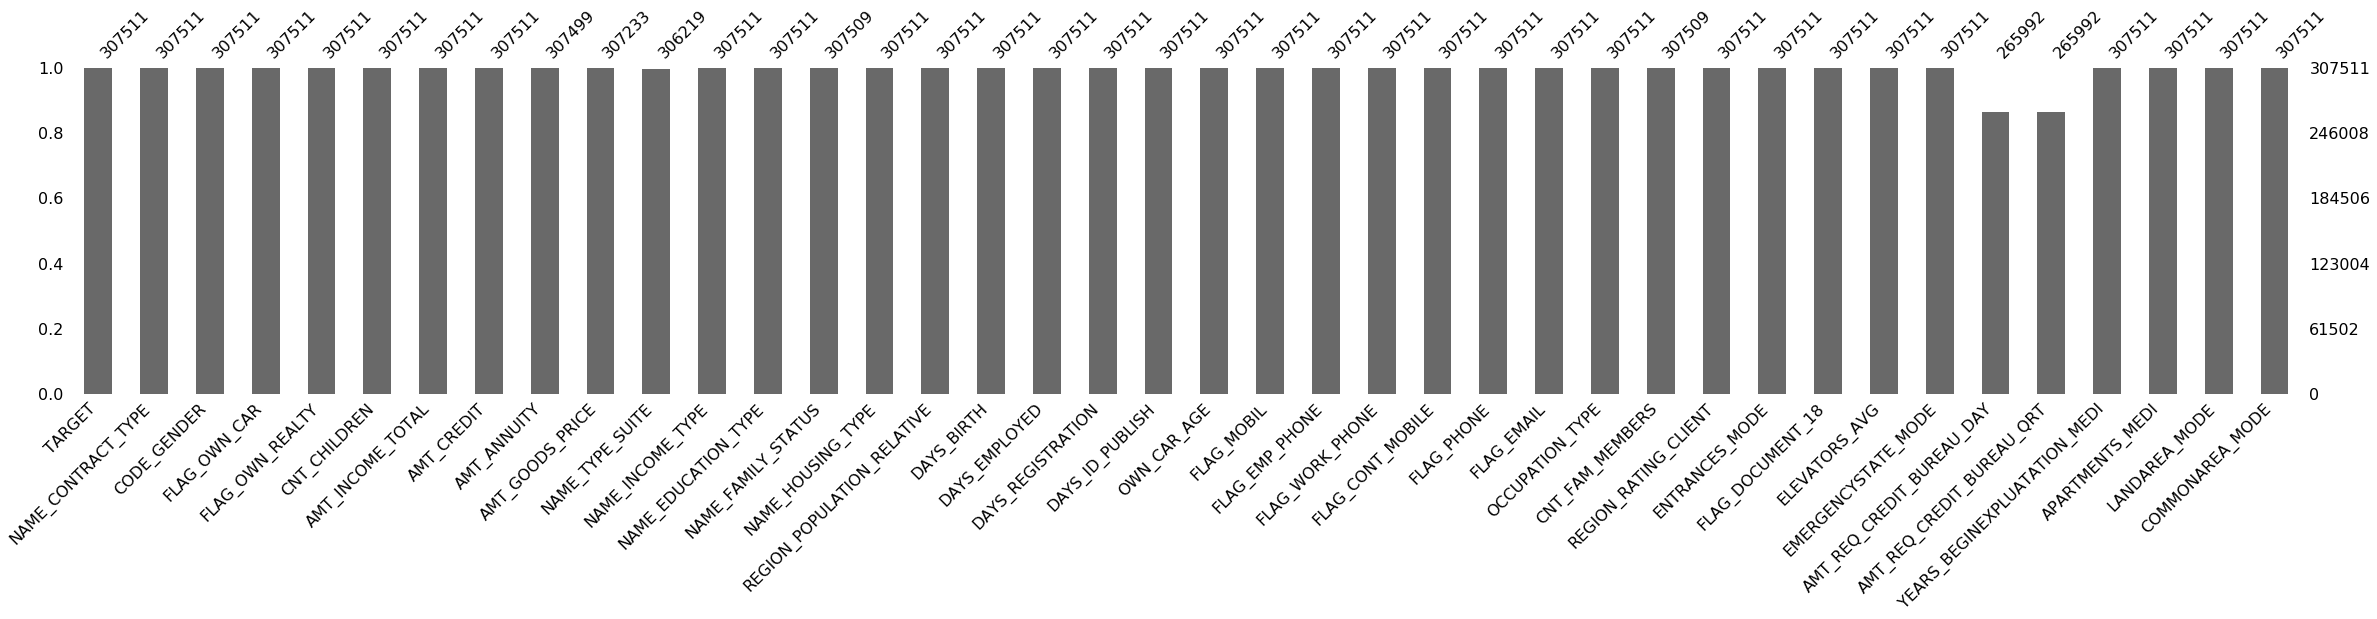

In [56]:
mn.bar(df40,figsize=(40,6))

In [57]:
df40.to_csv('application_train_40c5.csv') # guardo as alteracoes feitas

#### Conhecendo as variaveis que ainda precisam de tratamento

In [58]:
df40 = pd.read_csv('application_train_40c5.csv', index_col=0) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [59]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].head(30)

,TARGET,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,,,
100002,1,0.0,0.0
100003,0,0.0,0.0
100004,0,0.0,0.0
100006,0,NaN,NaN
100007,0,0.0,0.0
100008,0,0.0,1.0
100009,0,0.0,1.0
100010,0,0.0,0.0
100011,0,0.0,0.0


In [60]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].corr()

,TARGET,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT
TARGET,1.000000,0.002704,-0.002022
AMT_REQ_CREDIT_BUREAU_DAY,0.002704,1.000000,-0.004416
AMT_REQ_CREDIT_BUREAU_QRT,-0.002022,-0.004416,1.000000


In [61]:
df40.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df40.AMT_REQ_CREDIT_BUREAU_DAY.mean(), inplace = True)

In [62]:
df40.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df40.AMT_REQ_CREDIT_BUREAU_QRT.mean(), inplace = True)

In [63]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].corr()

,TARGET,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT
TARGET,1.000000,0.002464,-0.001842
AMT_REQ_CREDIT_BUREAU_DAY,0.002464,1.000000,-0.004416
AMT_REQ_CREDIT_BUREAU_QRT,-0.001842,-0.004416,1.000000


In [64]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].head(30)

,TARGET,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,,,
100002,1,0.000,0.000000
100003,0,0.000,0.000000
100004,0,0.000,0.000000
100006,0,0.007,0.265474
100007,0,0.000,0.000000
100008,0,0.000,1.000000
100009,0,0.000,1.000000
100010,0,0.000,0.000000
100011,0,0.000,0.000000


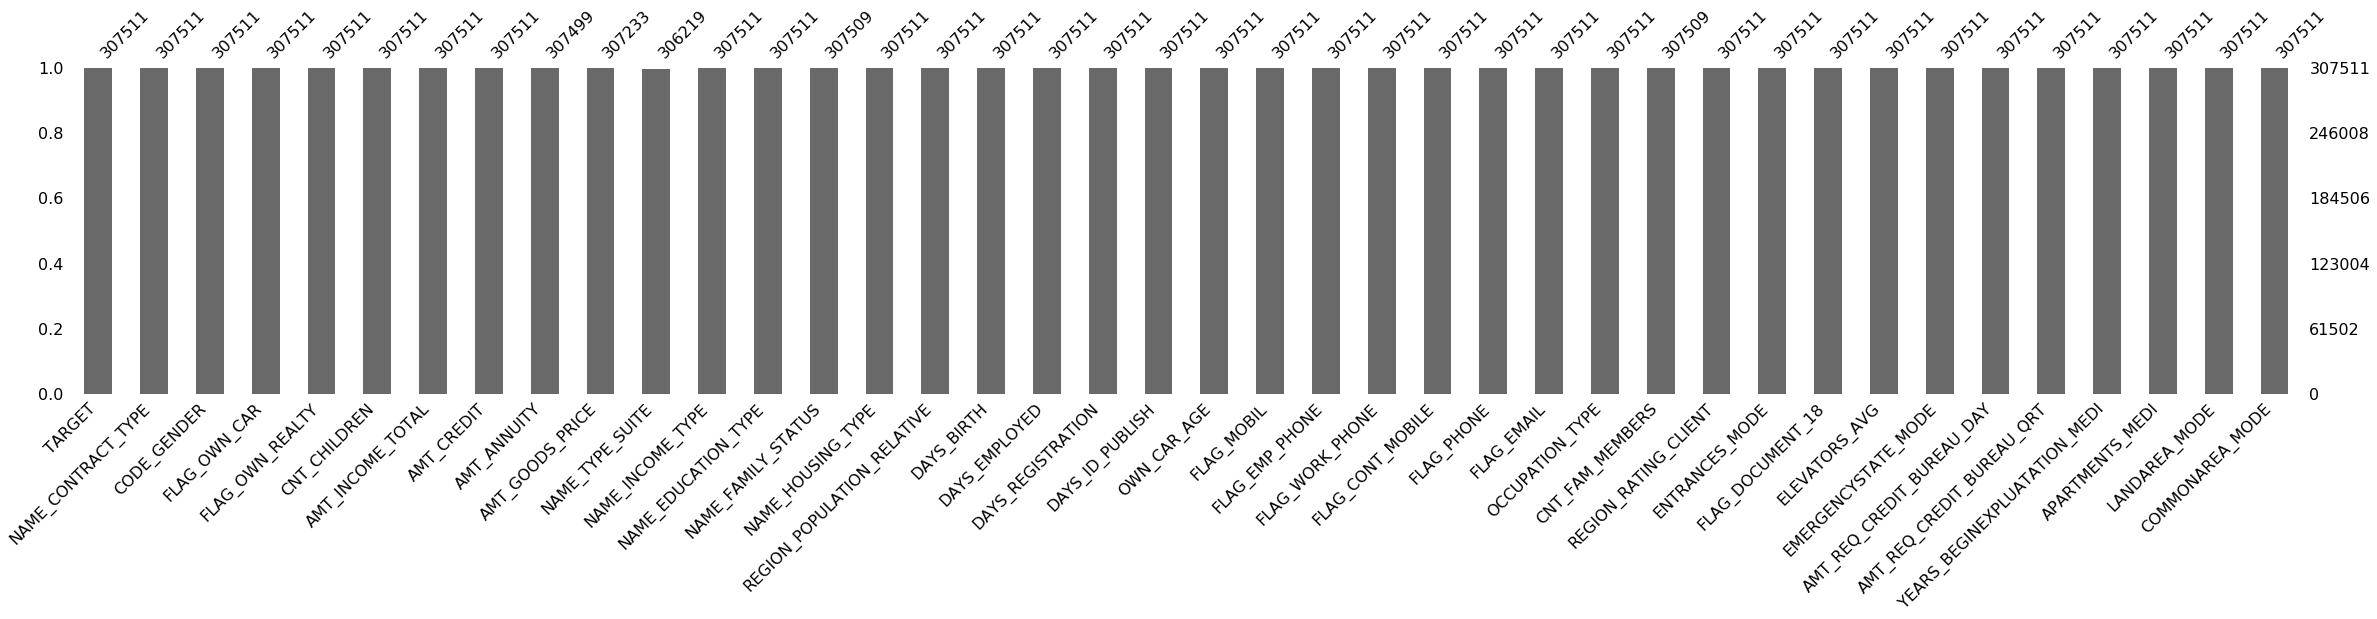

In [65]:
mn.bar(df40,figsize=(40,6))

Limpando eventuais NaNs que tenham sobrado

In [66]:
df40.dropna(inplace=True) 

In [67]:
df40.to_csv('application_train_40c6.csv') # guardo as alteracoes feitas

Verificando as variavies Object para transformar em discreta

In [68]:
df40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306207 entries, 100002 to 456255
Data columns (total 40 columns):
TARGET                          306207 non-null int64
NAME_CONTRACT_TYPE              306207 non-null object
CODE_GENDER                     306207 non-null object
FLAG_OWN_CAR                    306207 non-null object
FLAG_OWN_REALTY                 306207 non-null object
CNT_CHILDREN                    306207 non-null int64
AMT_INCOME_TOTAL                306207 non-null float64
AMT_CREDIT                      306207 non-null float64
AMT_ANNUITY                     306207 non-null float64
AMT_GOODS_PRICE                 306207 non-null float64
NAME_TYPE_SUITE                 306207 non-null object
NAME_INCOME_TYPE                306207 non-null object
NAME_EDUCATION_TYPE             306207 non-null object
NAME_FAMILY_STATUS              306207 non-null float64
NAME_HOUSING_TYPE               306207 non-null object
REGION_POPULATION_RELATIVE      306207 non-null float64


In [69]:
set(df40.NAME_CONTRACT_TYPE)

{'Cash loans', 'Revolving loans'}

In [70]:
df40.NAME_CONTRACT_TYPE.loc[df40.NAME_CONTRACT_TYPE == 'Cash loans'] = 1

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [71]:
df40.NAME_CONTRACT_TYPE.loc[df40.NAME_CONTRACT_TYPE == 'Revolving loans'] = 0

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
df40[['TARGET','NAME_CONTRACT_TYPE']].corr()

,TARGET,NAME_CONTRACT_TYPE
TARGET,1.00000,0.03118
NAME_CONTRACT_TYPE,0.03118,1.00000


In [73]:
set(df40.CODE_GENDER)

{'F', 'M', 'XNA'}

In [74]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'XNA']

SK_ID_CURR
141289    XNA
144669    XNA
196708    XNA
319880    XNA
Name: CODE_GENDER, dtype: object

In [75]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'XNA'] = np.nan

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'F'] = 1

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'M'] = 0

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [78]:
df40[['TARGET','CODE_GENDER']].corr()

,TARGET
TARGET,1.0


In [79]:
set(df40.FLAG_OWN_REALTY)

{'N', 'Y'}

In [80]:
df40.FLAG_OWN_REALTY.loc[df40.FLAG_OWN_REALTY == 'Y'] = 1

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [81]:
df40.FLAG_OWN_REALTY.loc[df40.FLAG_OWN_REALTY == 'N'] = 0

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [82]:
pd.crosstab(df40.TARGET,df40.FLAG_OWN_REALTY)

FLAG_OWN_REALTY,0,1
TARGET,,
0,85559,195893
1,7805,16950


In [83]:
df40[['TARGET','FLAG_OWN_REALTY']].corr()

,TARGET,FLAG_OWN_REALTY
TARGET,1.00000,-0.00669
FLAG_OWN_REALTY,-0.00669,1.00000


In [84]:
set(df40.NAME_TYPE_SUITE)

{'Children',
 'Family',
 'Group of people',
 'Other_A',
 'Other_B',
 'Spouse, partner',
 'Unaccompanied'}

In [85]:
pd.crosstab(df40.TARGET,df40.NAME_TYPE_SUITE)

NAME_TYPE_SUITE,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
TARGET,,,,,,,
0,3026,37139,248,790,1596,10475,228178
1,241,3009,23,76,174,895,20337


In [86]:
set(df40.NAME_INCOME_TYPE)

{'Businessman',
 'Commercial associate',
 'Maternity leave',
 'Pensioner',
 'State servant',
 'Student',
 'Unemployed',
 'Working'}

In [87]:
pd.crosstab(df40.TARGET,df40.NAME_INCOME_TYPE)

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
TARGET,,,,,,,,
0,10,65916,3,52191,20365,17,14,142936
1,0,5338,2,2973,1244,0,8,15190


In [88]:
set(df40.NAME_EDUCATION_TYPE)

{'Academic degree',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Secondary / secondary special'}

In [89]:
pd.crosstab(df40.TARGET,df40.NAME_EDUCATION_TYPE)

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
TARGET,,,,,
0,160,70423,9371,3392,198106
1,3,3990,870,417,19475


In [90]:
set(df40.OCCUPATION_TYPE)

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Unknown',
 'Waiters/barmen staff'}

In [91]:
pd.crosstab(df40.TARGET,df40.OCCUPATION_TYPE)

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff
TARGET,,,,,,,,,,,,,,,,,,,
0,9294,4194,5309,25697,16416,525,10626,488,49146,1726,19953,7935,2464,689,28874,1208,5974,89746,1188
1,474,447,620,1729,2104,34,700,34,5824,359,1322,569,173,59,3083,92,720,6260,152


#### Verificando as correlacoes

In [92]:
df40 = pd.read_csv('application_train_40c6.csv', index_col=0) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [93]:
df40.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ENTRANCES_MODE,FLAG_DOCUMENT_18,ELEVATORS_AVG,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,LANDAREA_MODE,COMMONAREA_MODE
TARGET,1.000000,0.019271,-0.003920,-0.030310,-0.012813,-0.039583,-0.012394,-0.037246,0.078573,-0.045067,...,-0.011392,-0.007827,-0.021567,-0.039263,2.569941e-03,-1.857753e-03,-0.006463,-0.019022,-0.005993,-8.363843e-03
CNT_CHILDREN,0.019271,1.000000,0.012894,0.002088,0.021478,-0.002030,0.177961,-0.025630,0.331188,-0.239869,...,-0.004473,0.003217,-0.004478,-0.036024,-1.041866e-04,-7.209901e-03,0.004262,-0.008672,-0.001312,2.458087e-04
AMT_INCOME_TOTAL,-0.003920,0.012894,1.000000,0.156150,0.191061,0.159047,0.012514,0.074503,0.027172,-0.064088,...,0.001869,0.003037,0.042145,0.047709,2.900613e-03,4.759511e-03,0.005318,0.031671,-0.003521,1.901958e-02
AMT_CREDIT,-0.030310,0.002088,0.156150,1.000000,0.769937,0.986975,0.126985,0.099483,-0.056324,-0.066042,...,0.006996,0.033760,0.057327,0.054913,3.601733e-03,1.520282e-02,0.004374,0.042872,0.001424,2.473805e-02
AMT_ANNUITY,-0.012813,0.021478,0.191061,0.769937,1.000000,0.775089,0.120946,0.118176,0.009496,-0.104056,...,0.005514,-0.009635,0.072835,0.064764,1.838982e-03,9.470336e-03,0.009855,0.054410,0.002273,2.851382e-02
AMT_GOODS_PRICE,-0.039583,-0.002030,0.159047,0.986975,0.775089,1.000000,0.129475,0.103403,-0.054611,-0.063886,...,0.010079,0.032343,0.059938,0.059322,4.034332e-03,1.567285e-02,0.005161,0.046499,0.006109,2.514221e-02
NAME_FAMILY_STATUS,-0.012394,0.177961,0.012514,0.126985,0.120946,0.129475,1.000000,-0.008091,0.034025,-0.089383,...,0.004829,-0.003402,0.005563,-0.072289,-1.769449e-03,3.085728e-03,0.003267,-0.001275,0.006645,2.602468e-03
REGION_POPULATION_RELATIVE,-0.037246,-0.025630,0.074503,0.099483,0.118176,0.103403,-0.008091,1.000000,-0.029589,-0.004176,...,0.012723,0.013325,0.217608,0.090536,1.057945e-03,-1.012491e-03,-0.005408,0.159397,-0.044245,8.545653e-02
DAYS_BIRTH,0.078573,0.331188,0.027172,-0.056324,0.009496,-0.054611,0.034025,-0.029589,1.000000,-0.615745,...,-0.006685,0.043664,-0.000973,-0.017413,2.453062e-03,-1.074482e-02,0.000729,0.003580,0.002309,5.317362e-03
DAYS_EMPLOYED,-0.045067,-0.239869,-0.064088,-0.066042,-0.104056,-0.063886,-0.089383,-0.004176,-0.615745,1.000000,...,0.003458,-0.039536,-0.006610,-0.011890,3.707987e-04,1.418971e-02,0.005954,-0.011248,-0.005304,-7.176556e-03


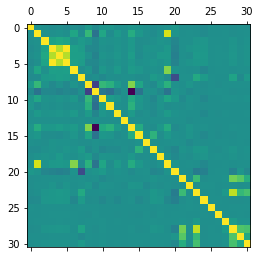

In [94]:
plt.matshow(df40.corr())

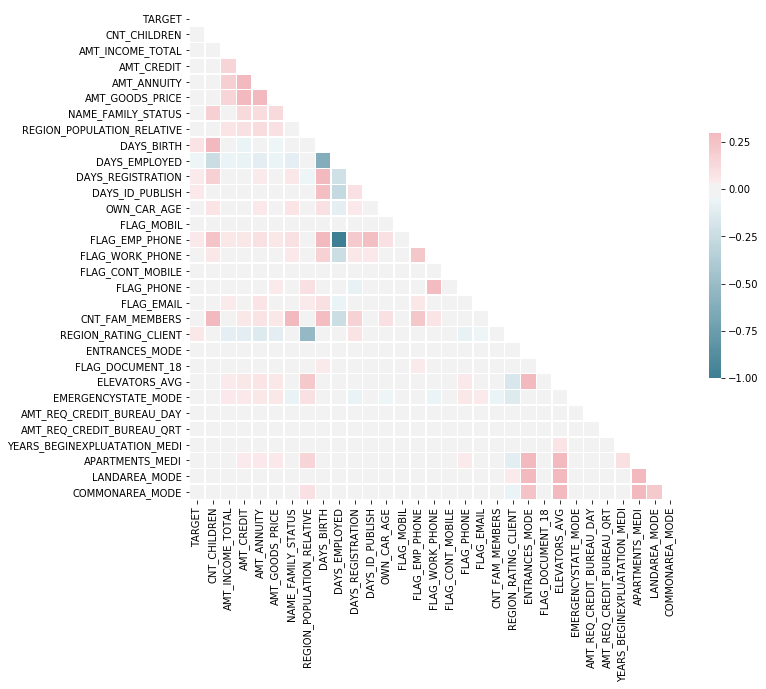

In [95]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df40.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df40.corr().round(2), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

TARGET    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

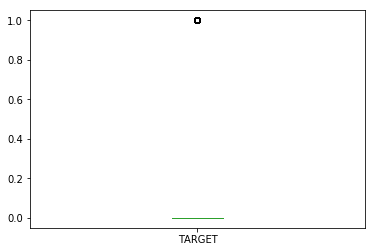

In [103]:
df40.TARGET.plot(kind='box', subplots=True, )